## Dreambooth Fine tuning

In [1]:
!pip install b2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.6/103.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.5/281.5 kB 14.8 MB/s eta 0:00:00


In [2]:
import subprocess

def configure_b2(account_id, application_key):
    command = f"b2 authorize-account {account_id} {application_key}"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)

    if result.returncode == 0:
        print("Authorization successful.")
        print(result.stdout)
    else:
        print("Authorization failed.")
        print(result.stderr)

# Replace these with your actual account ID and application key
account_id = "c063d873e14e"
application_key = "004fb2500f70554bfa2d850f0f656f3c757f887af1"

configure_b2(account_id, application_key)

Authorization successful.
{
    "accountAuthToken": "4_004c063d873e14e0000000000_01bb1f0a_6e92ac_acct_KqvhuGzkeWya4IPo53_Axy2Ofco=",
    "accountFilePath": "/root/.config/b2/account_info",
    "accountId": "c063d873e14e",
    "allowed": {
        "bucketId": null,
        "bucketName": null,
        "capabilities": [
            "bypassGovernance",
            "deleteBuckets",
            "deleteFiles",
            "deleteKeys",
            "listAllBucketNames",
            "listBuckets",
            "listFiles",
            "listKeys",
            "readBucketEncryption",
            "readBucketLogging",
            "readBucketNotifications",
            "readBucketReplications",
            "readBucketRetentions",
            "readBuckets",
            "readFileLegalHolds",
            "readFileRetentions",
            "readFiles",
            "shareFiles",
            "writeBucketEncryption",
            "writeBucketLogging",
            "writeBucketNotifications",
            "write

In [4]:
!b2 download-file-by-name robot7 rendered_256x256.7z rendered_256x256.7z

File name:           rendered_256x256.7z
File id:             4_zac40e6f38d8857a38ed1041e_f25296b0ac3123f0d_d20250318_m174500_c004_v0402025_t0003_u01742319900869
Output file path:    /content/rendered_256x256.7z
File size:           3624446549
Content type:        application/x-7z-compressed
Content sha1:        none
Encryption:          none
Retention:           none
Legal hold:          <unset>
INFO large_file_sha1: 8d33f94060683c0d6f081e3f3a77f818127ebdbf
INFO src_last_modified_millis: 1742311679905
rendered_256x256.7z: 100% 3.62G/3.62G [00:18<00:00, 210MB/s]Download finished
rendered_256x256.7z: 100% 3.62G/3.62G [00:23<00:00, 153MB/s]


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 15.6 MB/s eta 0:00:00


In [7]:
import py7zr

def extract_7z(file_path, extract_to='.'):
    with py7zr.SevenZipFile(file_path, mode='r') as z:
        z.extractall(path=extract_to)

# Example usage
file_path = '/content/rendered_256x256.7z'
extract_to = './'
extract_7z(file_path, extract_to)

In [8]:
!git clone https://github.com/huggingface/diffusers

Cloning into 'diffusers'...
remote: Enumerating objects: 84601, done.
remote: Counting objects: 100% (1282/1282), done.
remote: Compressing objects: 100% (601/601), done.
remote: Total 84601 (delta 1092), reused 683 (delta 679), pack-reused 83319 (from 4)
Receiving objects: 100% (84601/84601), 62.12 MiB | 21.79 MiB/s, done.
Resolving deltas: 100% (61906/61906), done.


In [9]:
%cd diffusers
!pip install .
%cd examples/dreambooth
!pip install -r requirements.txt
!accelerate config default

/content/diffusers
Processing /content/diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.33.0.dev0-py3-none-any.whl size=3507090 sha256=37846eda3de96daa397485d312d036ad79d5e2092faaf2201ded0a7e47004424
  Stored in directory: /tmp/pip-ephem-wheel-cache-z1io4bmx/wheels/30/15/ca/ab6e88c89d6ba7047b3f155894c6c346e7cf06067fd132ae62
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.32.2
    Uninstalling diffusers-0.32.2:
      Successfully uninstalled diffusers-0.32.2
/content/diffusers/examples/dreambooth
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.

In [10]:
# # Links to go from dreambooth to drive from here to save the results
# db_to_drive_path = './../../../drive/MyDrive/SketchToReality/'
# drive_to_db_path = './../../../../diffusers/examples/dreambooth'

In [11]:
!pip install -q diffusers transformers accelerate peft # Trick found online to make it work
!pip install xformers
!pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 12.4 MB/s eta 0:00:00


In [17]:
!accelerate launch "/content/diffusers/examples/dreambooth/train_dreambooth.py" \
 --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5" \
 --instance_data_dir="/content/256x256/sketch/tx_000000000000/dog" \
 --instance_prompt="a photo of a dog in the style of sks" \
 --output_dir "./dreambooth_sequential_results" \
 --use_8bit_adam \
 --gradient_checkpointing \
 --enable_xformers_memory_efficient_attention \
 --set_grads_to_none \
 --train_batch_size=2 \
 --gradient_accumulation_steps=1 \
 --learning_rate=5e-6 \
 --lr_scheduler="constant" \
 --lr_warmup_steps=0 \
 --max_train_steps=400

2025-03-18 22:53:08.288342: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742338388.548733    5930 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742338388.617113    5930 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-18 22:53:09.131344: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
03/18/2025 22:53:17 - INFO - __main__ - Distributed environment: DistributedType.NO
Num processes: 1
Process index: 0

## Now doing Inference on the trained set

In [25]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols, "Number of images must match rows * cols"

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols * w, rows * h))

    for index, img in enumerate(imgs):
        x = (index % cols) * w
        y = (index // cols) * h
        grid.paste(img, box=(x, y))

    return grid

In [19]:
from torch import autocast
from diffusers import StableDiffusionPipeline
import torch

model_id = "./dreambooth_sequential_results"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

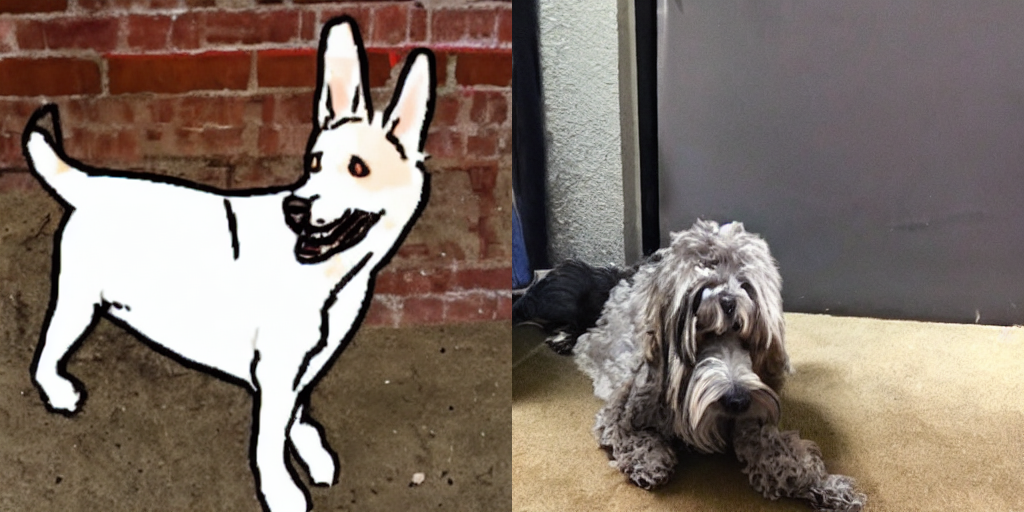

In [23]:
from torch import autocast
prompt = "a photo of sks dog" #@param {type:"string"}

num_samples = 1 #@param {type:"number"}
num_rows = 2 #@param {type:"number"}

all_images = []
for _ in range(num_rows):
    images = pipe(prompt, num_images_per_prompt=num_samples, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)

grid = image_grid(all_images, num_samples, num_rows)
grid

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

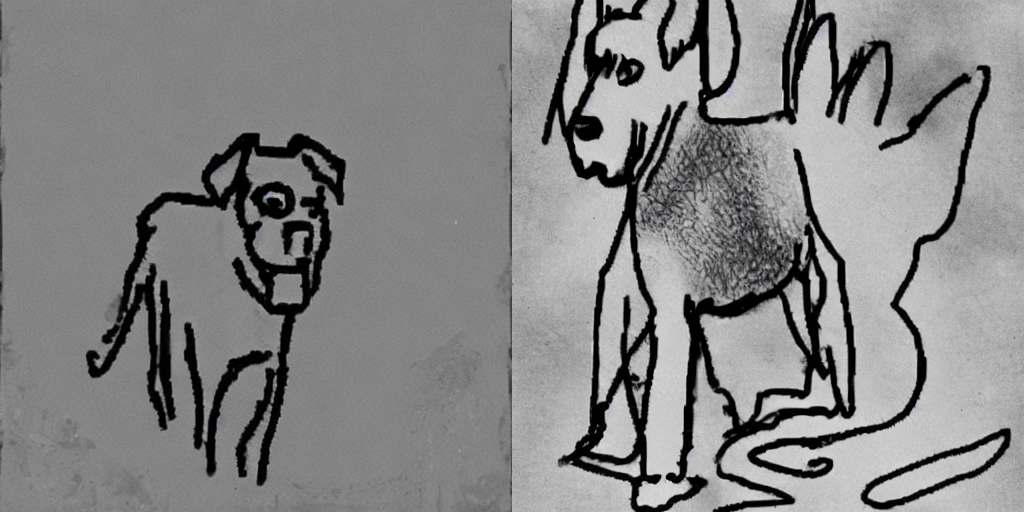

In [24]:

from torch import autocast
prompt = "a photo of a dog in the style of sks" #@param {type:"string"}

num_samples = 1 #@param {type:"number"}
num_rows = 2 #@param {type:"number"}

all_images = []
for _ in range(num_rows):
    images = pipe(prompt, num_images_per_prompt=num_samples, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)

grid = image_grid(all_images, num_samples, num_rows)
grid

In [26]:
%ls

dreambooth_sequential_results/
